The project aims at analysing the housing price data and coming up with a model to estimate the price of houses.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show,output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
# import the dowloaded dataset from kaggle.com
# (https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)
houses = pd.read_csv (r'C:\Mustafa - Files\Online courses and contineous education\IBM_Coursera_2021\6 - House prices - Data analysis with python\kc_house_data.csv')

In [3]:
houses.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

**Variable names in the dataset**
* Variable	Description
* id	A notation for a house
* date	Date house was sold
* price	Price is prediction target
* bedrooms	Number of bedrooms
* bathrooms	Number of bathrooms
* sqft_living	Square footage of the home
* sqft_lot	Square footage of the lot
* floors	Total floors (levels) in house
* waterfront	House which has a view to a waterfront
* view	Has been viewed
* condition	How good the condition is overall
* grade	overall grade given to the housing unit, based on King County grading system
* sqft_above	Square footage of house apart from basement
* sqft_basement	Square footage of the basement
* yr_built	Built Year
* yr_renovated	Year when house was renovated
* zipcode	Zip code
* lat	Latitude coordinate
* long	Longitude coordinate
* sqft_living15	Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15	LotSize area in 2015(implies-- some renovations)

In [4]:
# shape
houses.shape

(21613, 21)

In [5]:
# checck if the dataframe has empty data
houses.notnull().sum()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [6]:
# check the datatypes
houses.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
#create year column 
function = lambda x:x[0:4]
houses['year'] = houses['date'].apply(function)

In [8]:
houses.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  year  
0        5650  2014  
1        7639  2014  
2        8062  2015  
3        5000  2014  
4        7503  2015  

[5 rows x 22 columns]

### Explore the dataset with visuals

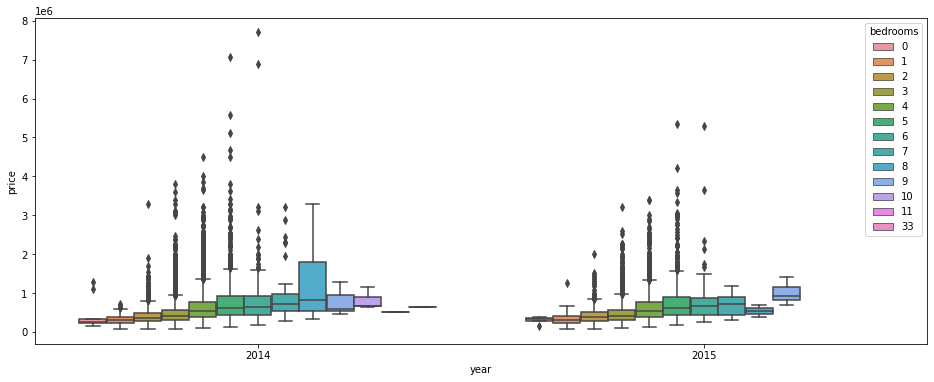

In [9]:
plt.figure(figsize = [16, 6]) 
sns.boxplot(x='year',y='price', hue = 'bedrooms', data=houses);

Text(0, 0.5, 'Price')

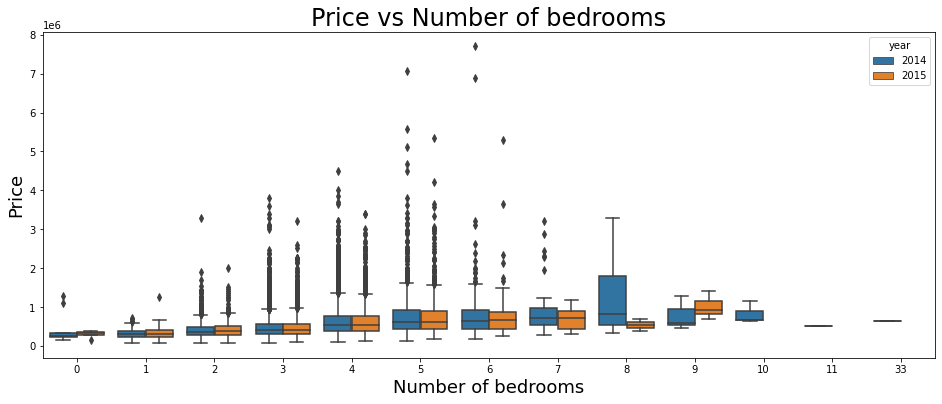

In [10]:
plt.figure(figsize = [16, 6]) 
sns.boxplot(hue='year',y='price', x = 'bedrooms', data=houses);
plt.title('Price vs Number of bedrooms',fontsize=24)
plt.xlabel('Number of bedrooms',fontsize=18)
plt.ylabel('Price',fontsize=18)

Text(0, 0.5, 'Price')

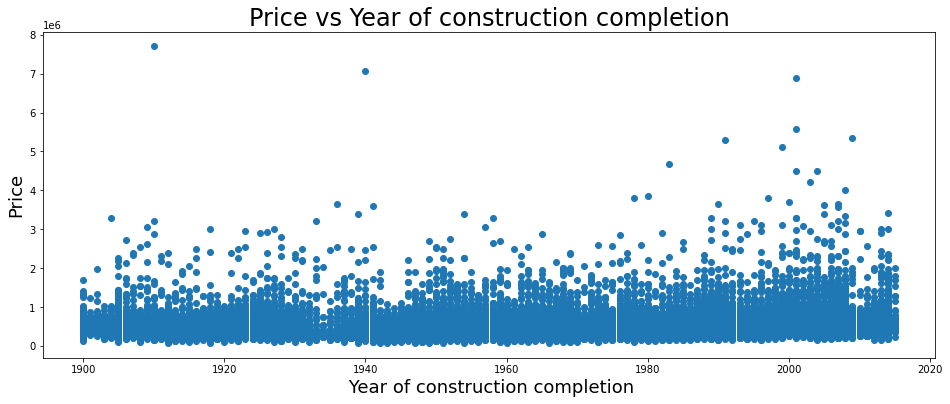

In [11]:
plt.figure(figsize = [16, 6]) 
plt.scatter(x='yr_built',y='price', data=houses);
plt.title('Price vs Year of construction completion',fontsize=24)
plt.xlabel(' Year of construction completion',fontsize=18)
plt.ylabel('Price',fontsize=18)

**create corraltion matrix between parameters in the dataset**

In [12]:
# columns 
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year'],
      dtype='object')

In [13]:
# columns to get investigated their correlations (numerical columns)
houses_col = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

In [14]:
# create correlation dataframe 
## calculate the correlation coeffecients and create a dataframe to store results 
col_names = ('col', 'corr')
corr_df = pd.DataFrame(columns = col_names)

for i in houses_col:
    correlation = houses[['price', i]].corr()[i][0]
    corr_df = corr_df.append({'col': i ,'corr': correlation}, ignore_index = True)
corr_df.sort_values(by = 'corr', ascending = False)

col      corr
2     sqft_living  0.702035
8           grade  0.667434
9      sqft_above  0.605567
13  sqft_living15  0.585379
1       bathrooms  0.525138
6            view  0.397293
10  sqft_basement  0.323816
0        bedrooms  0.308350
5      waterfront  0.266369
4          floors  0.256794
12   yr_renovated  0.126434
3        sqft_lot  0.089661
14     sqft_lot15  0.082447
11       yr_built  0.054012
7       condition  0.036362

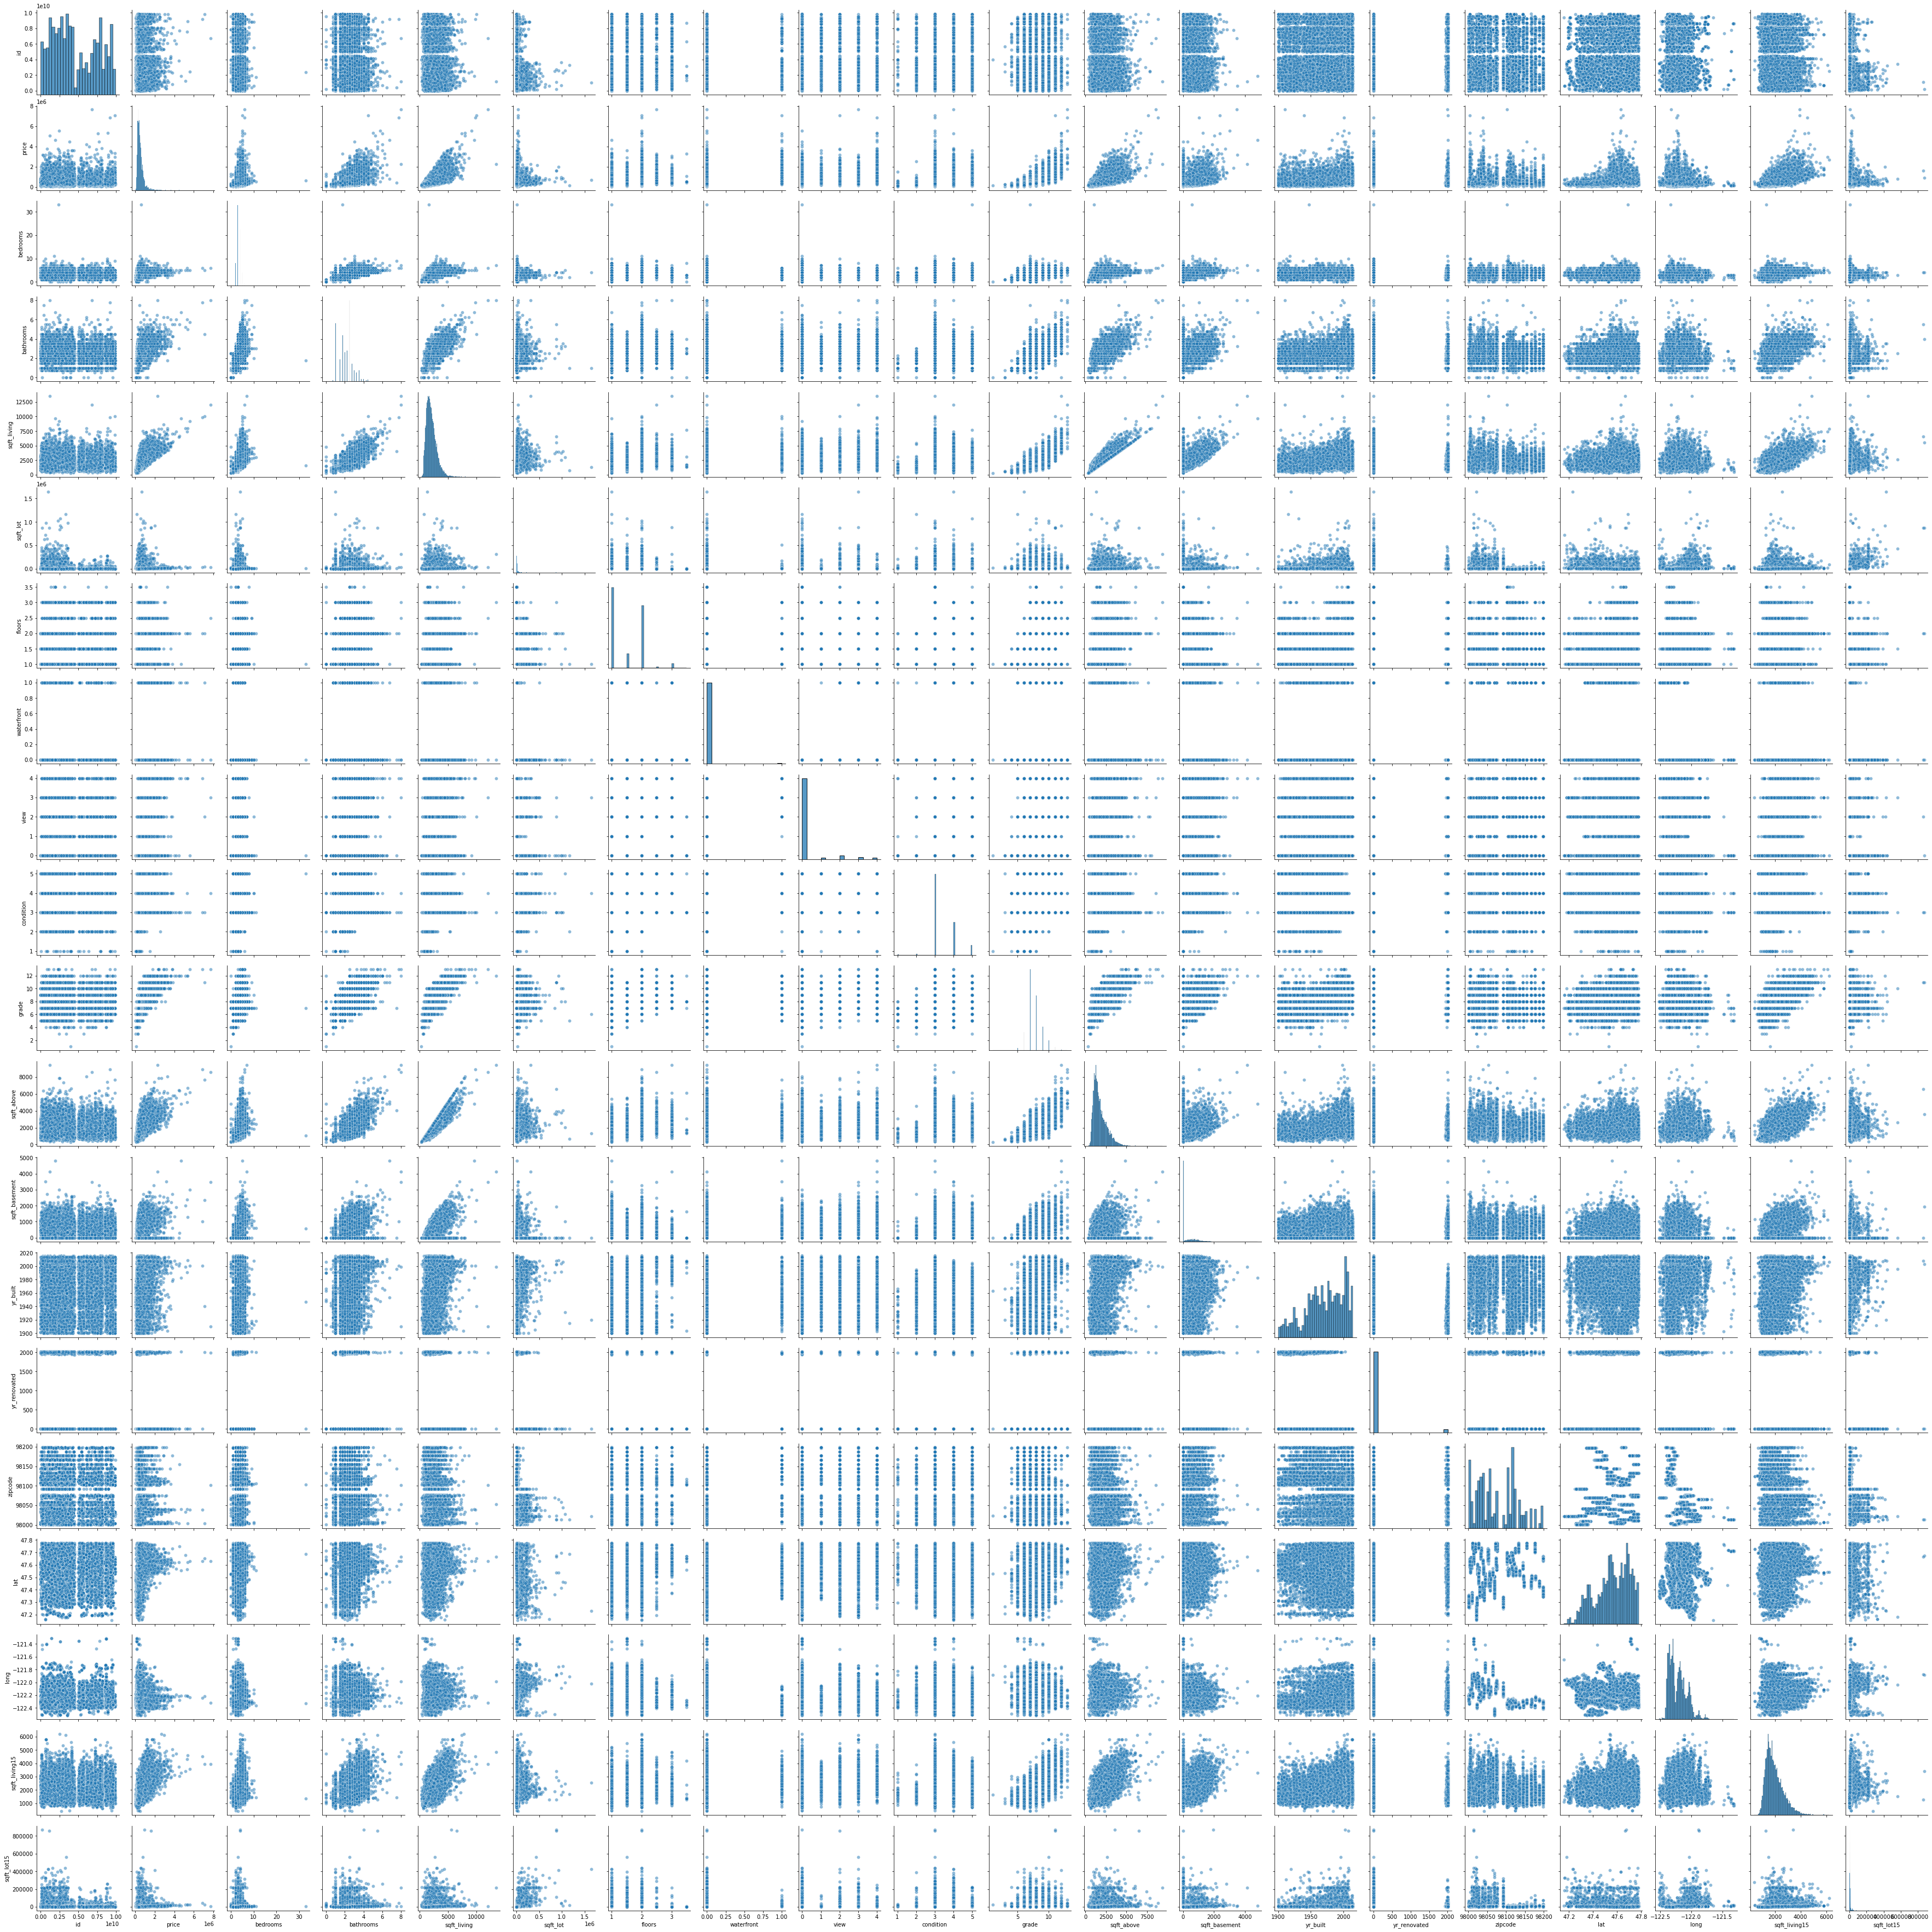

In [15]:
# construct a pariplot to understand the distributions of different variables
g = sns.pairplot(houses, plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;

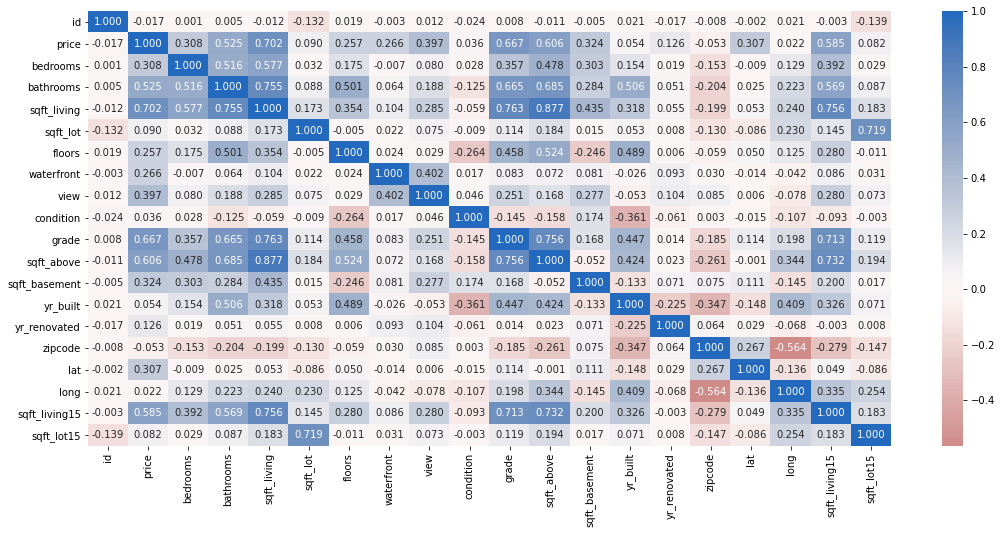

In [16]:
# construct heat map to understand the correlations between different variables
plt.figure(figsize = [18, 8])
sns.heatmap(houses.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()


### Construct linear regression models 

In [23]:
import statsmodels.api as sm

# Define the intercept
houses['intercept'] = 1
# apply linear regression model while selecting the majority of the parameters 

lm1 = sm.OLS(houses['price'],houses[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15', 'intercept']])
result1 = lm1.fit()

In [24]:
# read the results summary 
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2913.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:15:54   Log-Likelihood:            -2.9614e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21598   BIC:                         5.924e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.931e+04   2026.602    -19.395      0.000   -4.33e+04   -3.53e+04
bathrooms      4.575e+04   3492.347     13.099      0.000    3.89e+04    5.26e+04
sqft_living     109.2685      2.435     44.877      0.000     104.496     114.041
sqft_lot         -0.0016      0.051     -0.031      0.975      -0.102       0.099
floors         2.688e+04   3783.810      7.104      0.000    1.95e+04    3.43e+04
waterfront     5.791e+05   1.86e+04     31.072      0.000    5.43e+05    6.16e+05
view           4.324e+04   2273.166     19.020      0.000    3.88e+04    4.77e+04
condition      1.951e+04   2496.774      7.814      0.000    1.46e+04    2.44e+04
grade          1.197e+05   2249.149     53.230      0.000    1.15e+05    1.24e+05
sqft_above       51.5165      2.356     21.866      0.000      46.899      56.134
sqft_basement    57.7520      2.782     20.759      0.000      52.299      63.205
yr_built      -3570.1592     70.988    -50.292      0.000   -3709.302   -3431.017
yr_renovated     10.1596      3.914      2.596      0.009       2.488      17.831
sqft_living15    24.8733      3.600      6.909      0.000      17.816      31.930
sqft_lot15       -0.5505      0.078     -7.025      0.000      -0.704      -0.397
intercept      6.195e+06   1.38e+05     44.754      0.000    5.92e+06    6.47e+06
==============================================================================
Omnibus:                    16329.452   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194601.451
Skew:                           3.030   Prob(JB):                         0.00
Kurtosis:                      38.914   Cond. No.                     2.32e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
# get the model P-values
x = result1.pvalues.sort_values()
print(x)

sqft_living       0.000000e+00
grade             0.000000e+00
yr_built          0.000000e+00
intercept         0.000000e+00
waterfront       2.089598e-207
sqft_above       7.468739e-105
sqft_basement     8.482937e-95
bedrooms          4.302101e-83
view              5.265520e-80
bathrooms         4.723004e-39
condition         5.781607e-15
floors            1.252968e-12
sqft_lot15        2.200314e-12
sqft_living15     5.033494e-12
yr_renovated      9.443125e-03
sqft_lot          9.751014e-01
dtype: float64


Get parameters that have pvalue < 0.005

In [26]:
x[x<0.005]

sqft_living       0.000000e+00
grade             0.000000e+00
yr_built          0.000000e+00
intercept         0.000000e+00
waterfront       2.089598e-207
sqft_above       7.468739e-105
sqft_basement     8.482937e-95
bedrooms          4.302101e-83
view              5.265520e-80
bathrooms         4.723004e-39
condition         5.781607e-15
floors            1.252968e-12
sqft_lot15        2.200314e-12
sqft_living15     5.033494e-12
dtype: float64

In [27]:
lm2 = sm.OLS(houses['price'],houses[['bedrooms', 'bathrooms', 'sqft_living',
                                      'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15', 'intercept']])
result2 = lm2.fit()

In [28]:
# read the results summary 
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3397.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:17:41   Log-Likelihood:            -2.9615e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21600   BIC:                         5.924e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.946e+04   2025.401    -19.481      0.000   -4.34e+04   -3.55e+04
bathrooms      4.694e+04   3462.318     13.556      0.000    4.01e+04    5.37e+04
sqft_living     109.2909      2.432     44.930      0.000     104.523     114.059
floors         2.727e+04   3778.757      7.216      0.000    1.99e+04    3.47e+04
waterfront     5.818e+05   1.86e+04     31.269      0.000    5.45e+05    6.18e+05
view            4.34e+04   2271.511     19.104      0.000    3.89e+04    4.78e+04
condition      1.844e+04   2462.771      7.489      0.000    1.36e+04    2.33e+04
grade          1.198e+05   2248.887     53.291      0.000    1.15e+05    1.24e+05
sqft_above       51.5748      2.350     21.951      0.000      46.970      56.180
sqft_basement    57.7161      2.782     20.750      0.000      52.264      63.168
yr_built      -3628.5410     67.330    -53.892      0.000   -3760.513   -3496.569
sqft_living15    24.4894      3.593      6.816      0.000      17.448      31.531
sqft_lot15       -0.5493      0.056     -9.833      0.000      -0.659      -0.440
intercept      6.312e+06   1.31e+05     48.205      0.000    6.06e+06    6.57e+06
==============================================================================
Omnibus:                    16334.587   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195140.653
Skew:                           3.031   Prob(JB):                         0.00
Kurtosis:                      38.922   Cond. No.                     1.26e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
y_predicted1 = result1.predict(houses[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15', 'intercept']])

In [32]:
y_predicted2 = result2.predict(houses[['bedrooms', 'bathrooms', 'sqft_living',
                                      'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15', 'intercept']])

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


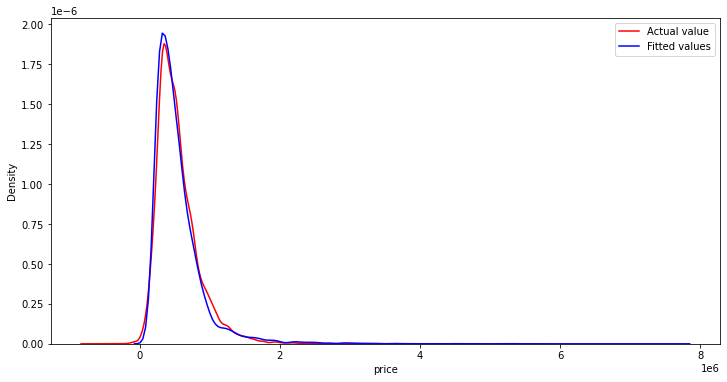

In [35]:
plt.figure(figsize=[12,6])
ax1 = sns.distplot(y_predicted1 , hist=False , color='r' , label = 'Actual value')
sns.distplot(houses['price'], hist = False , color = 'b' , label = 'Fitted values', ax = ax1)
plt.legend()


<AxesSubplot:xlabel='price'>

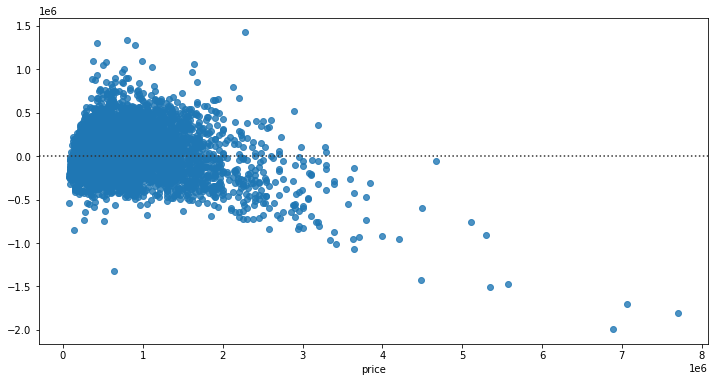

In [38]:
plt.figure(figsize=[12,6])
sns.residplot(houses['price'], y_predicted1)

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


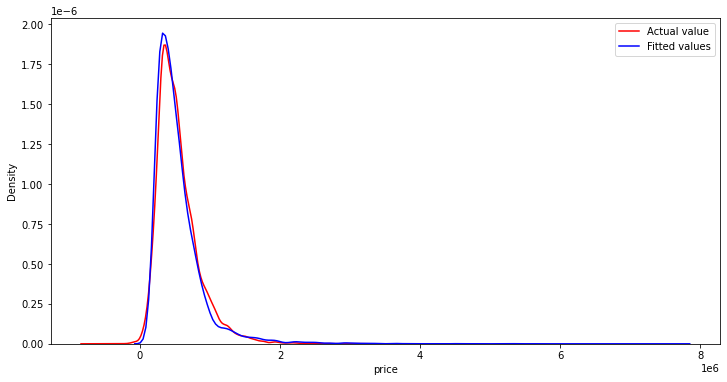

In [36]:
plt.figure(figsize=[12,6])
ax1 = sns.distplot(y_predicted2 , hist=False , color='r' , label = 'Actual value')
sns.distplot(houses['price'], hist = False , color = 'b' , label = 'Fitted values', ax = ax1)
plt.legend()

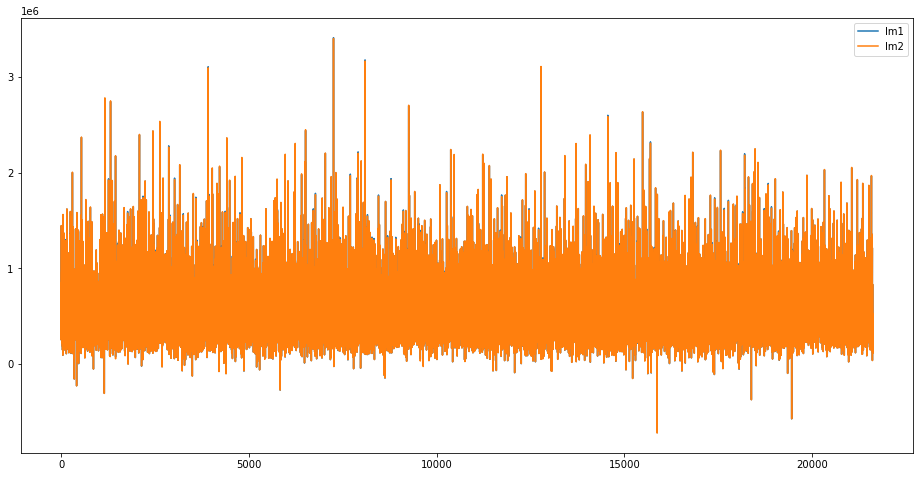

In [50]:
# compare the two models 
plt.figure(figsize = [16,8])
#houses['price'].plot.line(label = 'Actual')
y_predicted1.plot.line(label = 'lm1')
y_predicted2.plot.line(label = 'lm2')
plt.legend()